# Problem Statement

Introduction
Solving this case study will give you an idea about how real business problems are solved using EDA.
In this case study, apart from applying the techniques you have learnt in EDA, you will also develop a
basic understanding of risk analytics in banking and financial services and understand how data is
used to minimise the risk of losing money while lending to customers.

# Business Understanding
You work for a consumer finance company which specialises in lending various types of loans
to urban customers. When the company receives a loan application, the company has to make a
decision for loan approval based on the applicant’s profile. Two types of risks are associated with
the bank’s decision:

• If the applicant is likely to repay the loan, then not approving the loan results in a loss of
business to the company

• If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving
the loan may lead to a financial loss for the company


The data given below contains the information about past loan applicants and whether they
‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which
may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to
risky applicants) at a higher interest rate, etc.

In this case study, you will use EDA to understand how consumer attributes and loan
attributes influence the tendency of default.
When a person applies for a loan, there are two types of decisions that could be taken by the
company:
    
1. Loan accepted: If the company approves the loan, there are 3 possible scenarios described
below:
    
o Fully paid: Applicant has fully paid the loan (the principal and the interest rate)
    
o Current: Applicant is in the process of paying the instalments, i.e. the tenure of the
loan is not yet completed. These candidates are not labelled as 'defaulted'.

o Charged-off: Applicant has not paid the instalments in due time for a long period of
time, i.e. he/she has defaulted on the loan

2. Loan rejected: The company had rejected the loan (because the candidate does not meet
their requirements etc.). Since the loan was rejected, there is no transactional history of
those applicants with the company and so this data is not available with the company (and
thus in this dataset)


# Exploratory Data Analysis

Let's start with importing all the required libraries for the analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('loan.csv')

In [3]:
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
df.shape

(39717, 111)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [7]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

# Data Cleaning

In [8]:
#checking the null values in each columns
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [9]:
#percentage of null values in each column
round(df.isnull().sum()/len(df.index))*100
#from the analysis above we can see that there are columns which actually have 100% null values

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [10]:
# removing the columns having more than 80% missing values
null_columns = df.columns[100*(df.isnull().sum()/len(df.index)) > 80]
print(null_columns)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [11]:
#dropping the columns which consist more than 80%null values
df = df.drop(null_columns, axis=1)
print(df.shape)

(39717, 55)


In [12]:
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [13]:
(df.isnull().sum()/len(df.index))*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [14]:
#column "desc" and "mths_since_last_delinq" have null value around 32% and 65% 
#column "emp_title" also have null value but considering that it will be important component
df.loc[:, ['desc']].head()

,desc
0,Borrower added on 12/22/11 > I need to upgra...
1,Borrower added on 12/22/11 > I plan to use t...
2,NaN
3,Borrower added on 12/21/11 > to pay for prop...
4,Borrower added on 12/21/11 > I plan on combi...


In [15]:
df["mths_since_last_delinq"].head(5)

0     NaN
1     NaN
2     NaN
3    35.0
4    38.0
Name: mths_since_last_delinq, dtype: float64

In [16]:
df["emp_title"].head(5)

0                         NaN
1                       Ryder
2                         NaN
3         AIR RESOURCES BOARD
4    University Medical Group
Name: emp_title, dtype: object

In [17]:
df["emp_title"].nunique()

28820

In [18]:
df=df.drop(['mths_since_last_delinq','desc'],axis=1)

In [19]:
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [21]:
(df.isnull().sum()/len(df.index))

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     0.061913
emp_length                    0.027066
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.000277
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [22]:
df.isnull().sum() #checking count of null values in each columns

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2459
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec             

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [24]:
# The column int_rate is character type, let's convert it to float
df["int_rate"].head(5)

0    10.65%
1    15.27%
2    15.96%
3    13.49%
4    12.69%
Name: int_rate, dtype: object

In [25]:
# The column int_rate is character type, let's convert it to float
df['int_rate'] = df['int_rate'].apply(lambda x: x.replace("%",''))

In [26]:
df['int_rate']

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: object

In [27]:
df["int_rate"]=df["int_rate"].astype(float)

In [28]:
df["emp_length"].head(3)

0    10+ years
1     < 1 year
2    10+ years
Name: emp_length, dtype: object

In [29]:
#filling the null values 
df['emp_length']=df['emp_length'].fillna(df['emp_length'][0])

In [30]:
df['emp_length'].isna().sum()

0

In [31]:
# using regular expression to extract numeric values from the string
import re
df['emp_length'] = df['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

In [32]:
df["emp_length"].head(3)

0    10
1     1
2    10
Name: emp_length, dtype: object

In [33]:
#converting it into float from the type object
df["emp_length"]=df["emp_length"].astype(float)
df["emp_length"].head(3)

0    10.0
1     1.0
2    10.0
Name: emp_length, dtype: float64

In [34]:
df.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       10
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

There are a few columns having a single unique value or all unique values. 
These may have nothing much to contribute to the analysis  Some other columns are redundant.
Some of these columns are:

id :
is a random number given to the loan, does not contribute to analysis
member_id :
is a random number given to the member, does not contribute to analysis
pymnt_plan :
value for entire dataset is 'n', therefore can be removed.
url :
is a URL for LC page for corresponding to each memberid, nothing to do with loan default.
zip_code :
first 3 digits of the 5 digit zip code are visible, also is redundant with addr_state, does not contribute to analysis
initial_list_status :
value for entire dataset is 'f' out of the possible values, therefore can be removed.
policy_code :
value for entire dataset is '1', indicating all are publicly available, therefore nothing to contribute for analysis, to be removed.
application_type :
value for entire dataset is 'INDIVIDUAL', indicating all are individual applications not joint, therefore nothing to contribute for analysis, to be removed.
acc_now_delinq :
value for entire dataset is '0', therefore can be removed.
delinq_amnt :
value for entire dataset is '0', therefore can be removed.
funded_amnt :
value for this column is almost equivalent to loan_amnt. removing to avoid multi colinearity.
funded_amnt_inv :
value for this column is almost equivalent to funded_amnt. removing to avoid multi colinearity. Also this wont be available at the time of decision making of funding a loan.

In [35]:
df.drop([
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"],axis=1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,addr_state,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,AZ,27.65,f,0.0,1,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,GA,1.00,f,0.0,1,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,IL,8.72,f,0.0,1,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,CA,20.00,f,0.0,1,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,OR,17.94,f,0.0,1,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07,78.42,A,A4,...,CO,11.33,f,NaN,1,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28,275.38,C,C1,...,NC,6.40,f,NaN,1,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07,156.84,A,A4,...,MA,2.30,f,NaN,1,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43,155.38,A,A2,...,MD,3.72,f,NaN,1,0,NaN,0,NaN,NaN


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  float64
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  39717 non-null  float64
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [37]:
df = df.drop(['title', 'url', 'zip_code', 'addr_state'], axis=1)

In [38]:
df['loan_status'] = df['loan_status'].astype('category')
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [39]:
# filtering only fully paid or charged-off as current in loan_status consits only few values so mapping it in only 2 labels
df = df[df['loan_status'] != 'Current']
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)
# converting loan_status to integer type
df['loan_status'] = df['loan_status'].apply(lambda x: pd.to_numeric(x))
# summarising the values
df['loan_status'].value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

# Univariate and bivariate analysis

In [40]:
# default rate
round(np.mean(df['loan_status']),2)

0.15

The overall default rate is about 15%.

In [41]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

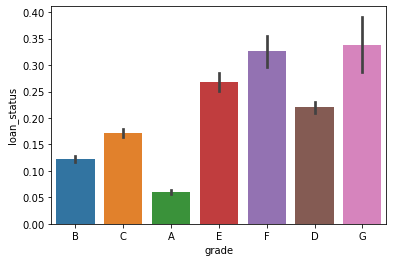

In [42]:
# plotting default rates across grade of the loan
import seaborn as sns
sns.barplot(x='grade', y='loan_status', data=df)
plt.show()

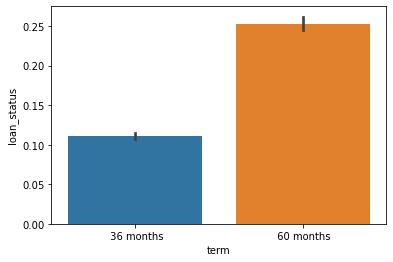

In [43]:
# plotting term across grade of the loan
sns.barplot(x='term', y='loan_status', data=df)

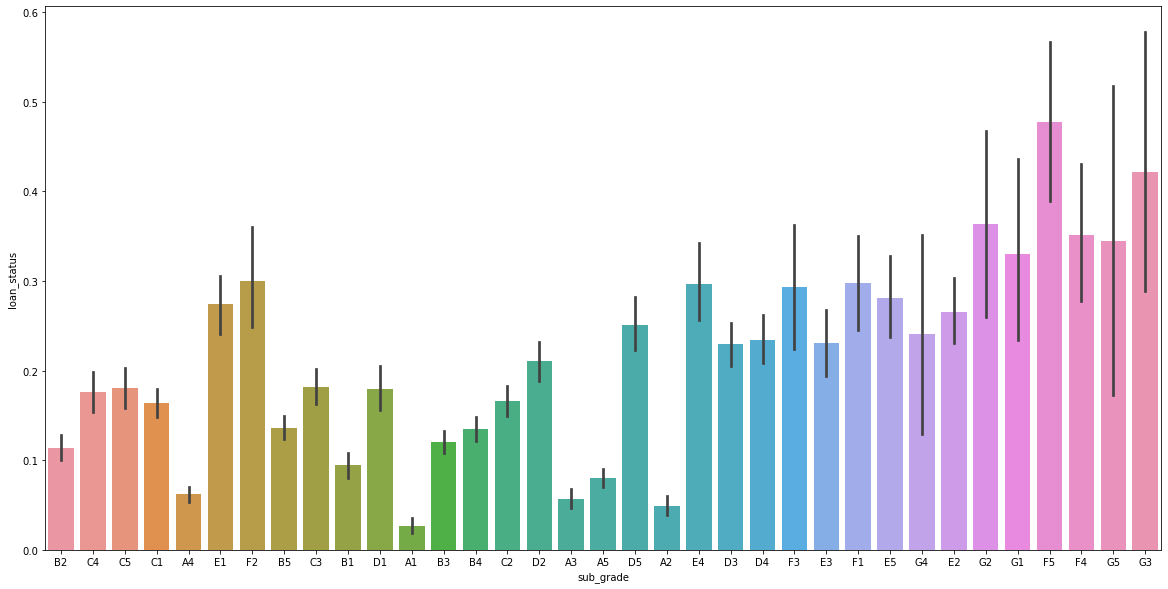

In [44]:
#comapre subgrade with the loan status
plt.figure(figsize=(20, 10))
sns.barplot(x='sub_grade', y='loan_status', data=df)

In [45]:
df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


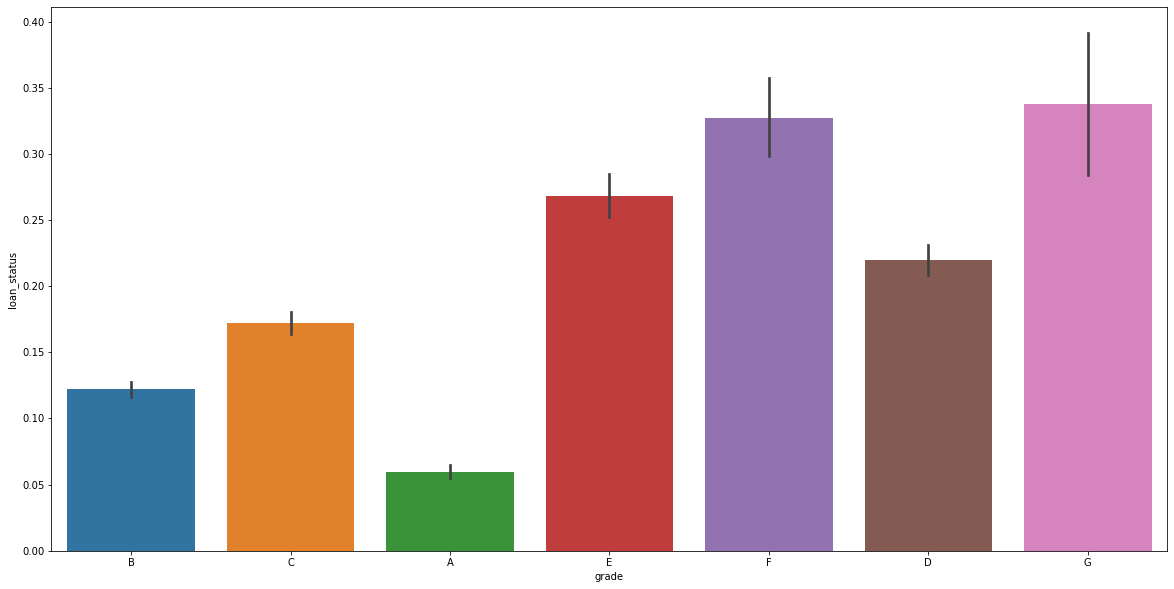

In [46]:
# plotting ststus across grade of the loan
plt.figure(figsize=(20, 10))
sns.barplot(x='grade', y='loan_status', data=df)

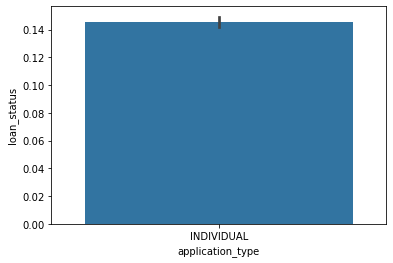

In [47]:
sns.barplot(x='application_type', y='loan_status', data=df)

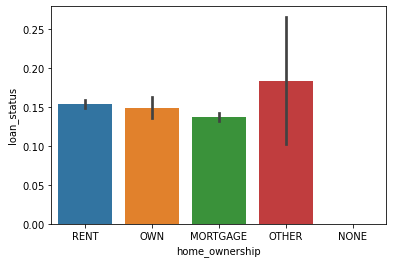

In [48]:
sns.barplot(x='home_ownership', y='loan_status', data=df)

In [49]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

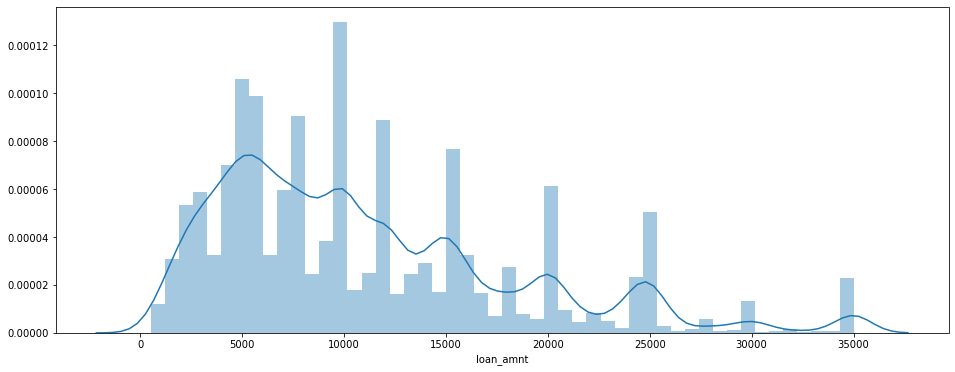

In [52]:
# loan amount: the median loan amount is around 10,000
plt.figure(figsize=(16, 6))
sns.distplot(df['loan_amnt'])

In [53]:
#Most of the loans granted are below 15000 (75 percentile value)
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,32950.0,10866.455994,7199.629493,500.0,5200.0,9600.0,15000.0,35000.0
1,5627.0,12104.385108,8085.732038,900.0,5600.0,10000.0,16500.0,35000.0


In [54]:
# binning loan amount
def loan_amount(n):
    if n < 5000:
        return 0
    elif n >=5000 and n < 15000:
        return 1
    elif n >= 15000 and n < 25000:
        return 2
    else:
        return 3
df['loan_amnt'] = df['loan_amnt'].apply(lambda x: loan_amount(x))

In [55]:
df['loan_amnt'].value_counts()

1    20675
2     7696
0     7444
3     2762
Name: loan_amnt, dtype: int64

In [56]:
df['funded_amnt_inv'] = df['funded_amnt_inv'].apply(lambda x: loan_amount(x))

In [57]:
df['funded_amnt_inv'].value_counts()

1    21038
0     9407
2     6771
3     1361
Name: funded_amnt_inv, dtype: int64

In [58]:
#Overall, the intrest rate varies from 5.42% to 24.4% with average intrest rate of 11.49%.
df.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,32950.0,11.609761,3.599964,5.42,8.49,11.49,13.99,24.11
1,5627.0,13.820432,3.654413,5.42,11.31,13.61,16.40,24.40


In [59]:
def int_rate(n):
    if n <= 10:
        return 0
    elif n > 10 and n <=15:
        return 1
    else:
        return 2    
df['int_rate'] = df['int_rate'].apply(lambda x: int_rate(x))

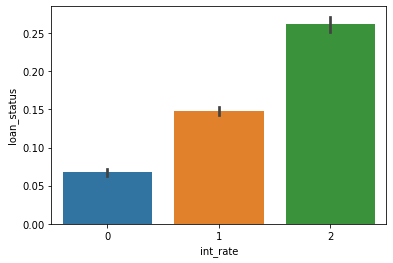

In [60]:
# comparing default rates across rates of interest
# high interest rates (n>15) is more, as expected
sns.barplot(x='int_rate', y='loan_status', data=df)

In [61]:
# debt to income ratio
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

df['dti'] = df['dti'].apply(lambda x: dti(x))

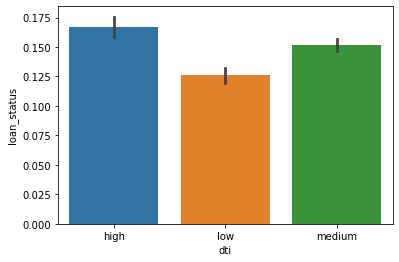

In [62]:
# comparing default rates across debt to income ratio high dti translates into higher default rates
sns.barplot(x='dti', y='loan_status', data=df)

In [63]:
# funded amount
def funded_amount(n):
    if n <= 5000:
        return 'low'
    elif n > 5000 and n <=15000:
        return 'medium'
    else:
        return 'high'   
df['funded_amnt'] = df['funded_amnt'].apply(lambda x: funded_amount(x))

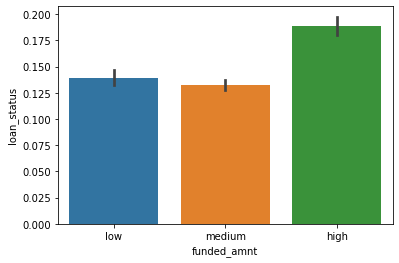

In [64]:
sns.barplot(x='funded_amnt', y='loan_status', data=df)

In [65]:
# annual income
def annual_income(n):
    if n <= 50000:
        return 0
    elif n > 50000 and n <=100000:
        return 1
    elif n > 100000 and n <=150000:
        return 2
    else:
        return 3
df['annual_inc'] = df['annual_inc'].apply(lambda x: annual_income(x))

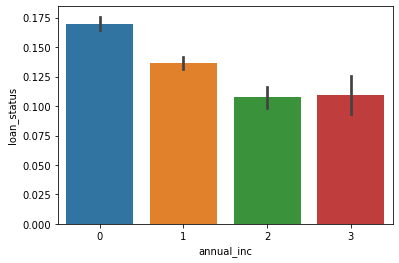

In [66]:
#annual income and loan status
#lower the annual income(n<50000), higher the default rate
sns.barplot(x='annual_inc', y='loan_status', data=df)

In [67]:
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,1,low,0,36 months,1,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,0,low,0,60 months,2,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,0,low,0,36 months,2,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,1,medium,1,36 months,1,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,1,low,1,36 months,0,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [68]:
#filling missing values with the most occuring value in the column i.e using mode
df['emp_length']=df["emp_length"].fillna(df["emp_length"].mode())
df["emp_length"].isna().sum()

0

In [69]:
def emp_length(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <=3:
        return 'junior'
    elif n > 3 and n <=7:
        return 'senior'
    else:
        return 'professional'
df['emp_length'] = df['emp_length'].apply(lambda x: emp_length(x))

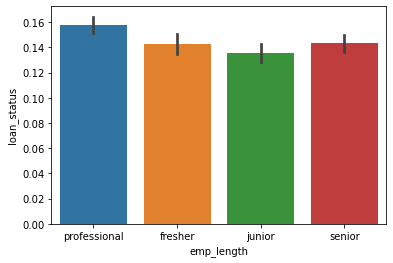

In [70]:
#not much variation between any of the labels 
sns.barplot(x='emp_length', y='loan_status', data=df)

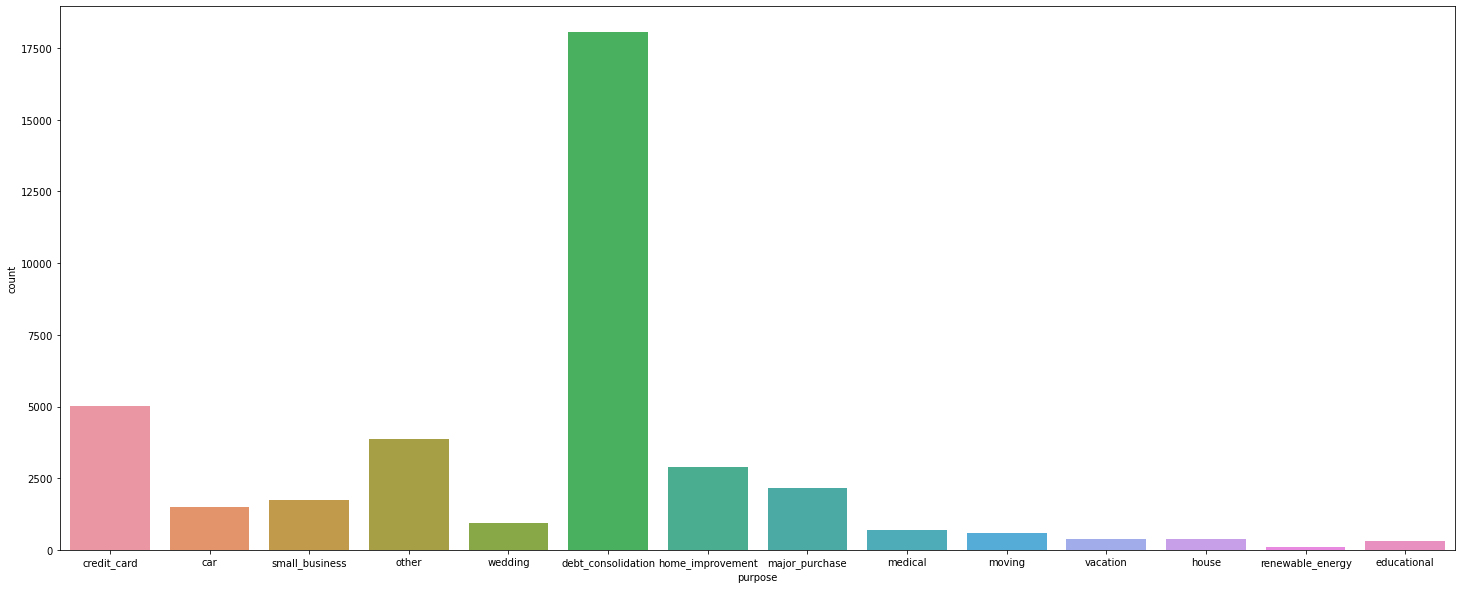

In [71]:
# most of the people had taken loan for debt consolidation
plt.figure(figsize=(25, 10))
sns.countplot(x='purpose', data=df)
plt.show()

In [72]:
df.purpose.unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

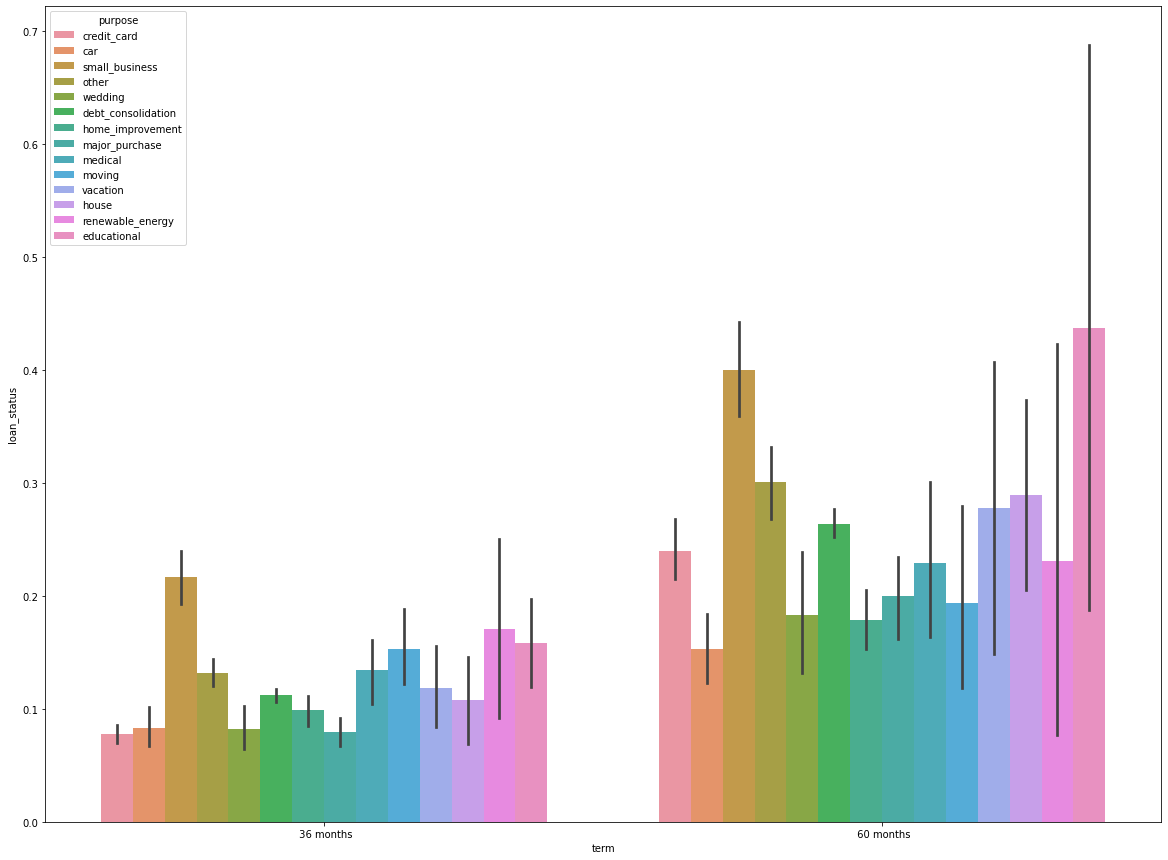

In [73]:
plt.figure(figsize=[20, 15])
sns.barplot(x='term', y="loan_status", hue='purpose', data=df)
plt.show()

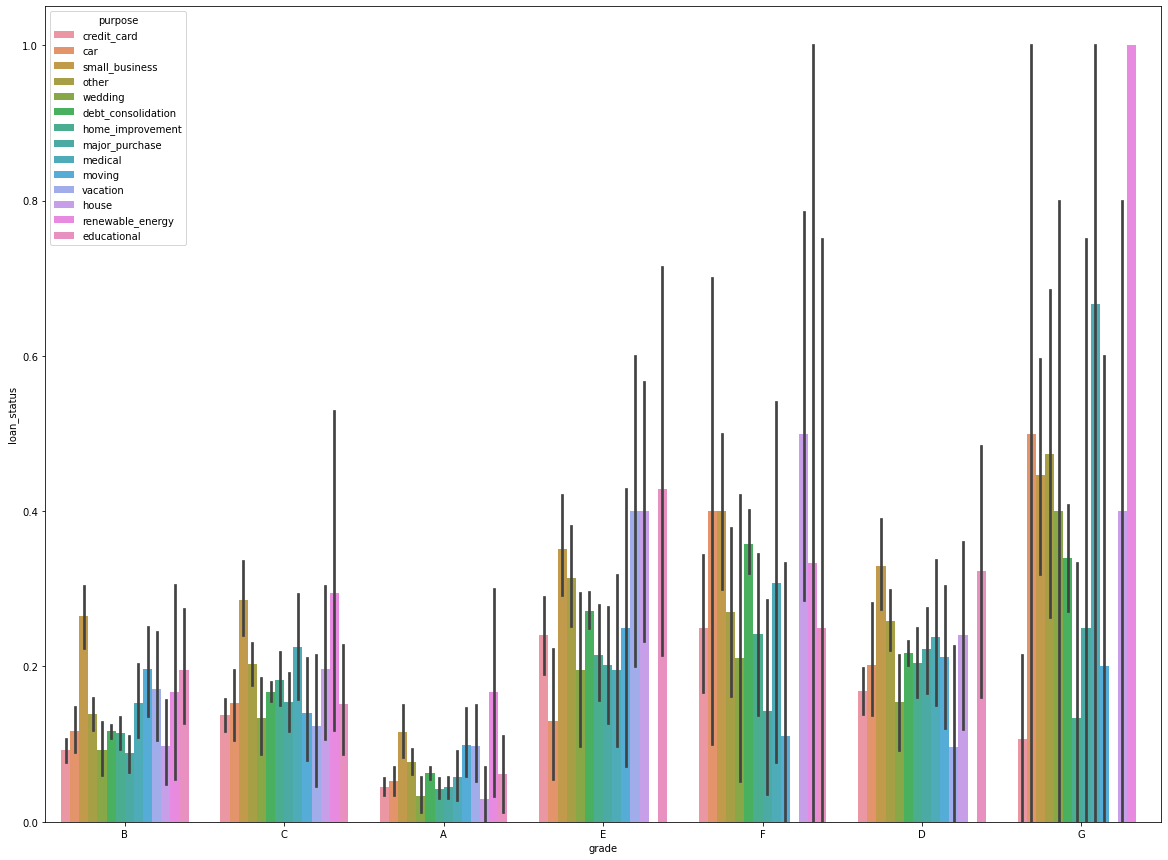

In [74]:
plt.figure(figsize=[20, 15])
sns.barplot(x='grade', y='loan_status', hue='purpose', data=df)

In [75]:
df.sub_grade.value_counts()

A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
C1    2055
B2    2001
C2    1931
A3    1810
B1    1797
A2    1508
C3    1488
D2    1286
C4    1206
C5    1154
A1    1139
D3    1116
D1     931
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G4      54
G3      45
G5      29
Name: sub_grade, dtype: int64

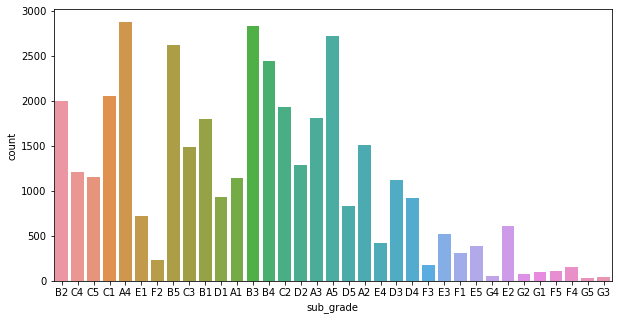

In [77]:
plt.figure(figsize=(10,5))
sns.countplot(df['sub_grade'])
plt.show()

In [79]:
#taking only major purpose
mpurposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
df['purpose'].value_counts()

debt_consolidation    18055
credit_card            5027
home_improvement       2875
major_purchase         2150
Name: purpose, dtype: int64

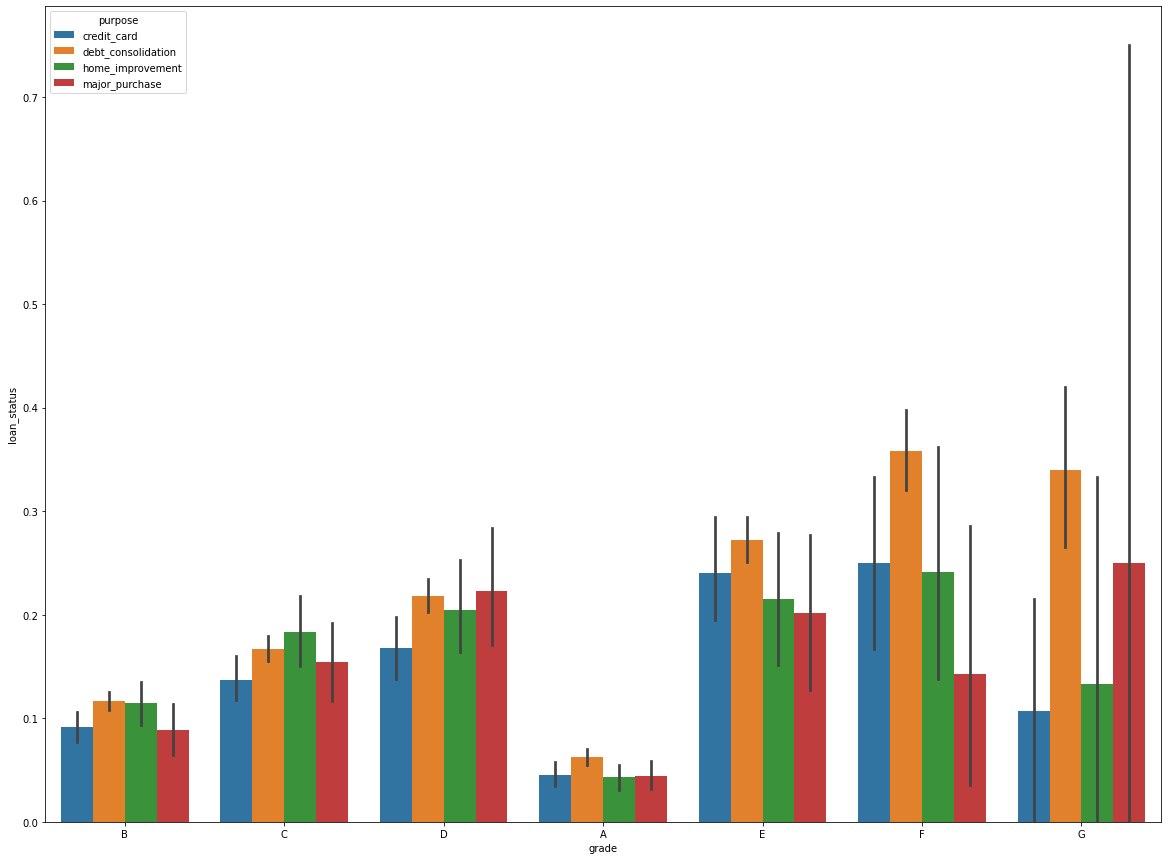

In [80]:
#Grade A and B loans are safe. 
#The percentages in full dataset are much higher than percentages in Charged Off loans.
#Grade D, E, F, G loans are less safe.
plt.figure(figsize=[20, 15])
sns.barplot(x='grade', y='loan_status', hue='purpose', data=df)

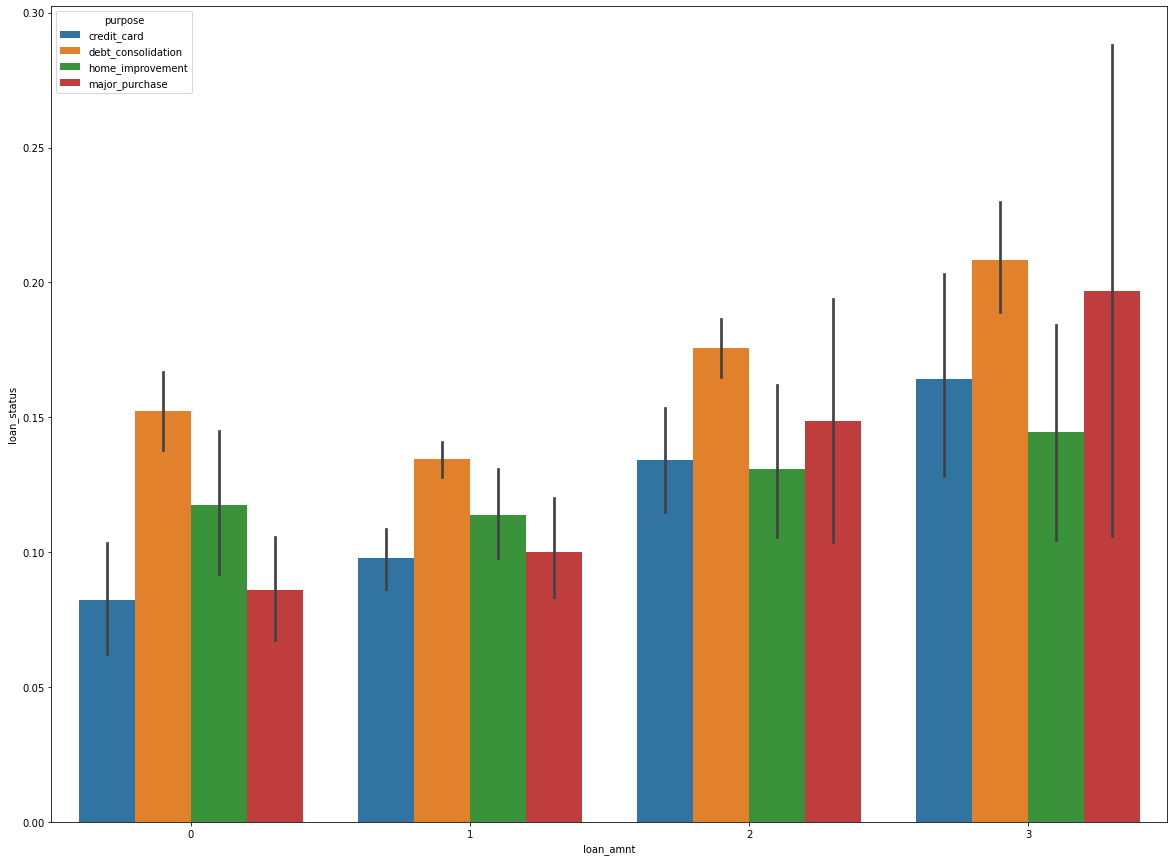

In [81]:
plt.figure(figsize=[20, 15])
sns.barplot(x='loan_amnt', y='loan_status', hue='purpose', data=df)

In [82]:
e_title=df.emp_title.value_counts().head(7)
print(e_title)

US Army              94
Bank of America      77
IBM                  48
Wells Fargo          45
Kaiser Permanente    45
US Air Force         41
AT&T                 41
Name: emp_title, dtype: int64


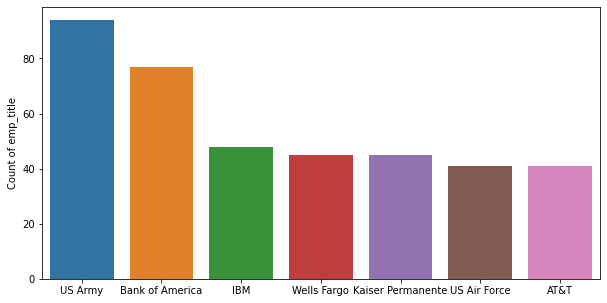

In [83]:
#Maximum of the loan takers are from the US Army, then Bank of America follwed by IBM and AT&T.
plt.figure(figsize=(10,5))
a=sns.barplot(x=e_title.index, y=e_title.values)
a.set_ylabel('Count of emp_title')
plt.show()

In [84]:
df.annual_inc.describe()

count    28107.000000
mean         0.800939
std          0.778300
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: annual_inc, dtype: float64

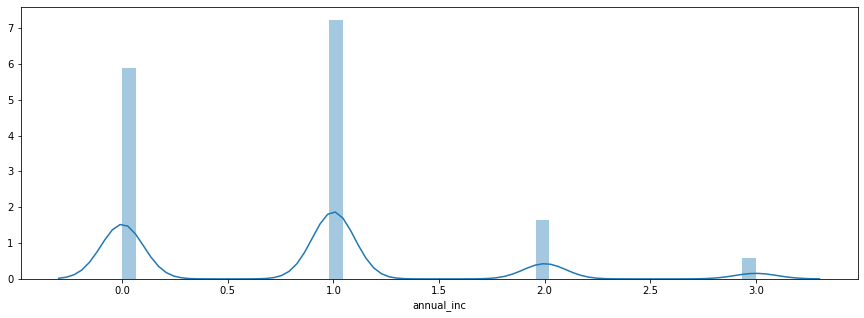

In [85]:
plt.figure(figsize=(15, 5))
sns.distplot(df['annual_inc'])
plt.show()

In [86]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [87]:
df.dti.describe()

count      28107
unique         3
top       medium
freq       13991
Name: dti, dtype: object

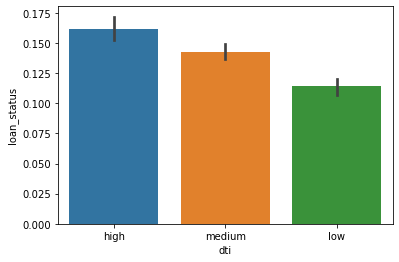

In [88]:
sns.barplot(x='dti', y='loan_status',data=df)

In [89]:
df.delinq_2yrs.value_counts(normalize=True)

0    0.896396
1    0.080727
2    0.016153
3    0.004554
4    0.001423
5    0.000463
6    0.000213
7    0.000071
Name: delinq_2yrs, dtype: float64

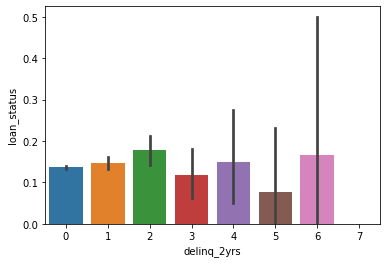

In [90]:
#The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years values ranges between 0 and 6.
sns.barplot(x='delinq_2yrs', y='loan_status',data=df)

In [91]:
df.total_acc.describe()

count    28107.000000
mean        22.739069
std         11.361548
min          2.000000
25%         14.000000
50%         21.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64

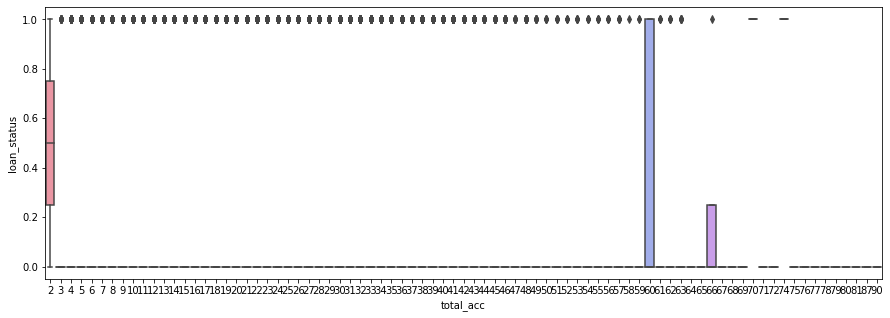

In [92]:
#The are approx. 22 average credit lines for the borrower's.
#There is no big difference between the Charged Off and Fully Paid credit lines
plt.figure(figsize=(15,5))
sns.boxplot(x=df.total_acc, y=df.loan_status,data=df)

In [93]:
df.last_pymnt_d.value_counts().head()

Dec-14    751
Mar-13    742
May-13    679
Feb-13    664
Jan-14    647
Name: last_pymnt_d, dtype: int64

In [94]:
df.last_pymnt_amnt.describe()

count    28107.000000
mean      3013.961718
std       4702.488640
min          0.000000
25%        250.580000
50%        654.070000
75%       4008.075000
max      35613.680000
Name: last_pymnt_amnt, dtype: float64

In [95]:
df["annual_inc"].head(3)

0     0
6     0
10    1
Name: annual_inc, dtype: int64

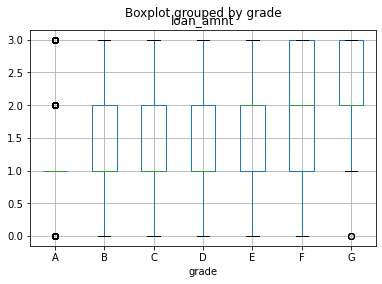

In [96]:
#Larger loans generally appear to be given a lower grade, with the median loan amount for a grade G loan being almost 10000 higher than that of a grade A, B, or C loan.
df.boxplot(column='loan_amnt', by='grade')

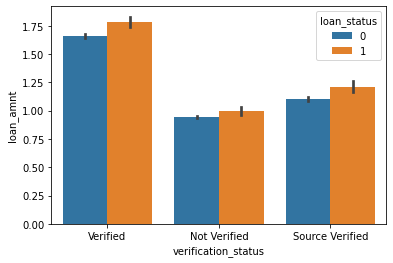

In [97]:
#Higher loan amounts are Verified more often.
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=df, estimator=np.mean)

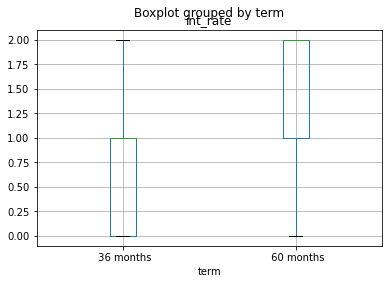

In [98]:
#Intrest rates are besed on term. Larger amounts were seen to be given for higher term
df.boxplot(column='int_rate', by='term')

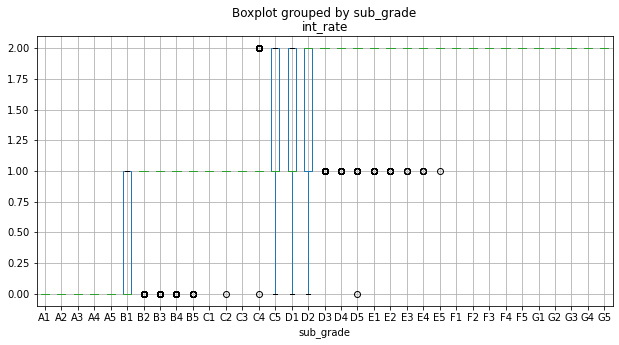

In [99]:
df.boxplot(column='int_rate', by='sub_grade',figsize=(10,5))

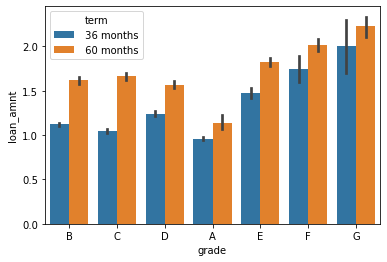

In [100]:
#Higher loan amount are associated with lower grade for longer terms
sns.barplot(x='grade', y='loan_amnt', hue="term", data=df)

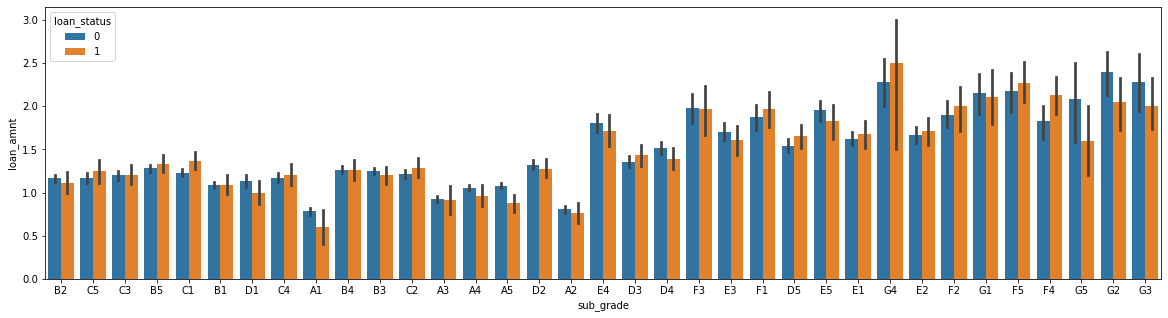

In [102]:
plt.figure(figsize=(20,5))
sns.barplot(x='sub_grade', y='loan_amnt', hue='loan_status',data=df)

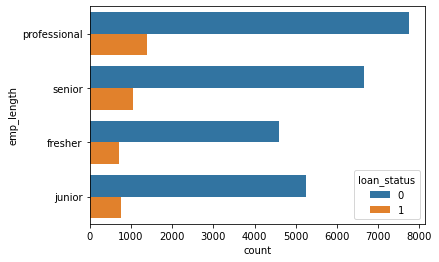

In [104]:
sns.countplot(y='emp_length',hue='loan_status',data=df)

In [108]:
df.pub_rec.unique()

array([0, 1, 2, 3, 4], dtype=int64)

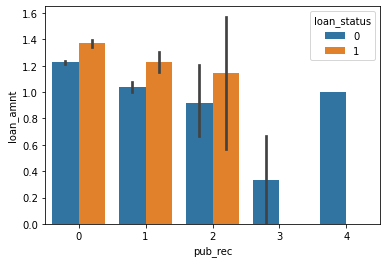

In [107]:
sns.barplot(x='pub_rec', y='loan_amnt', hue='loan_status',data=df)

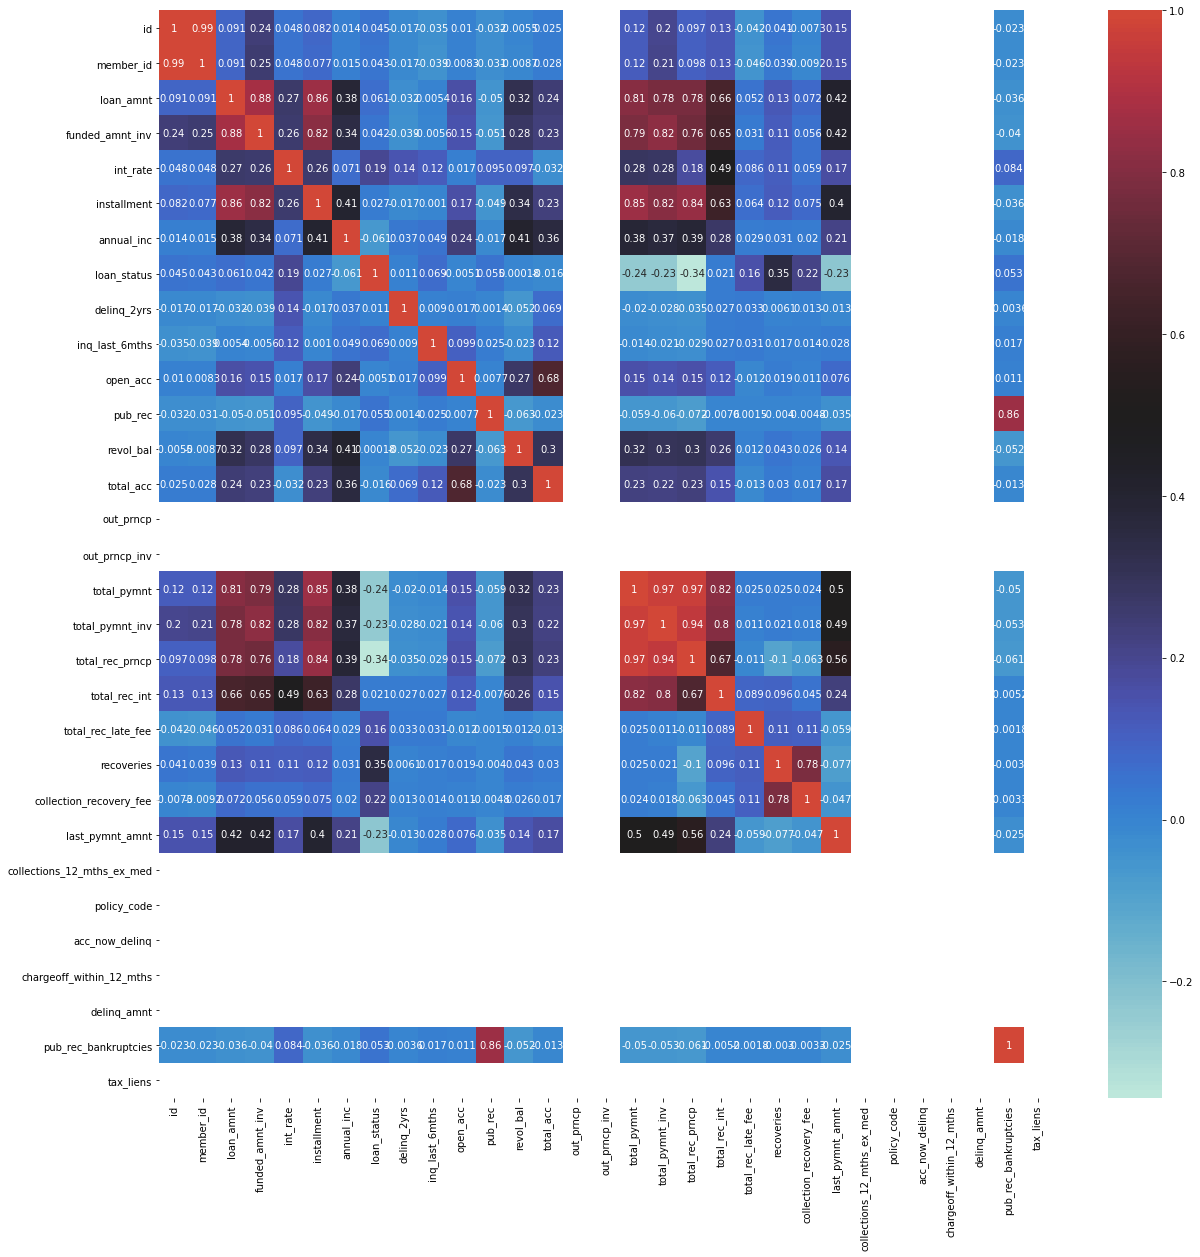

In [103]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True, center=0.5)